In [1]:
import os
import math
import torch
import torch.nn as nn
import torch.autograd as ag
import torch.optim as optim
import torchvision
import numpy as np

import ASDC_loader
import matplotlib.pyplot as plt

# Device configuration
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

In [2]:
# Data set
train_dataset = ASDC_loader.ASDC_Crop_Class_Dataset(dataset='train', truncate=-1, crop=(227,227))
#test_dataset = ASDC_loader.ASDC_Dataset(dataset='test')
print(len(train_dataset))

231723


In [3]:
from torchvision import models
model = models.alexnet(pretrained=True).to(device)

In [4]:
idxs = np.arange(10,100,10)
#idxs = [30]
print(idxs)

[10 20 30 40 50 60 70 80 90]


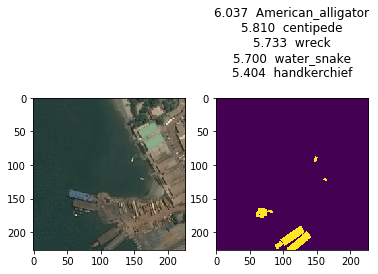

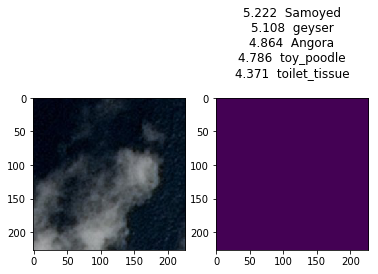

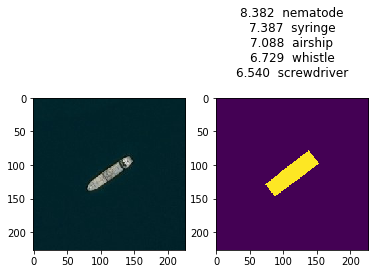

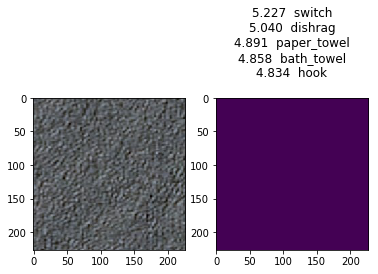

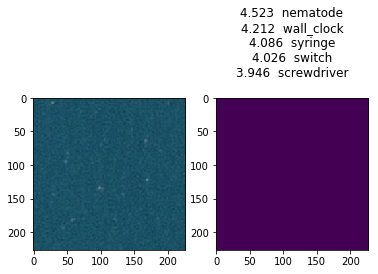

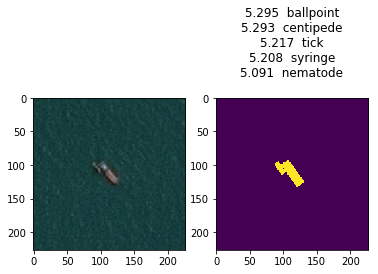

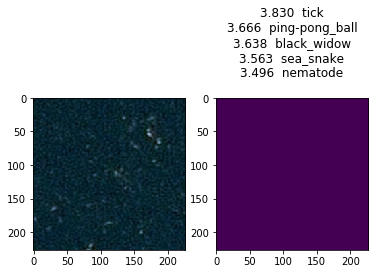

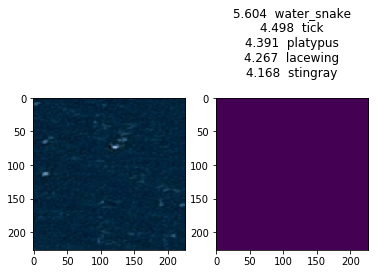

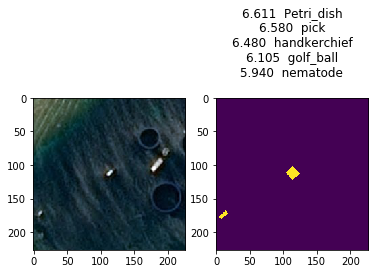

In [5]:
idx2label = ASDC_loader.get_IN_labels()
for i in idxs:
    image, label = train_dataset[i]
    #print('index:' + str(i) + ' image:' + str(image.shape) + ' label:' + str(label.shape))
    
    image.unsqueeze_(dim=0)
    plt.figure(i)
    plt.subplot(1,2,1)
    plt.imshow(ASDC_loader.torch2regular_image(image[0,:,:,:]))
    #cropped_image = ASDC_loader.crop_torch_image(image, (227,227))
    #print(cropped_image.shape)
    #plt.imshow(ASDC_loader.torch2regular_image(cropped_image[0,:,:,:]))
    #print(image.shape)
    plt.subplot(1,2,2)
    ship_mask = train_dataset.get_mask(i)
    plt.imshow(ship_mask[0,:,:])

    labels = model(image)
    #print(labels.shape)
    val, ilabels = torch.topk(labels, k=5, dim=1, sorted=True)
    title = ''
    
    for x in range(len(torch.squeeze(ilabels[:]))):
            
        title += '%.3f  ' % float(val[:,x]) + str(idx2label[ilabels[:,x]]) + '\n'
    plt.title(title)
    
plt.show()

In [6]:
print(ship_mask.shape)

(1, 227, 227)
